# <center>Assignment 4</center>

Q1) Perform dimensionality reduction using scikit-learn’s TSNE estimator on the Iris dataset, then graph
the results.

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------


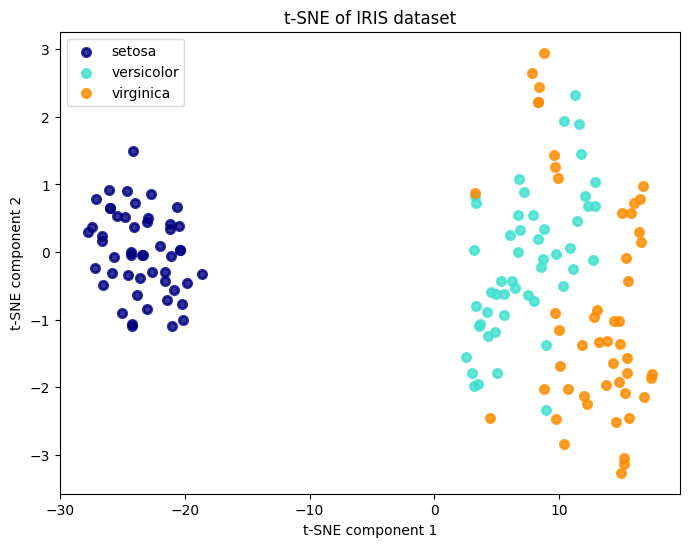

In [5]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
color=color, alpha=0.8, lw=lw,
label=target_name)
plt.title('t-SNE of IRIS dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

________________
Q2) Create a Seaborn pairplot graph for the California Housing dataset. Try the Matplotlib features to panning and zoom in on the diagram. These are accessible via the icons in the Matplotlib window.

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------


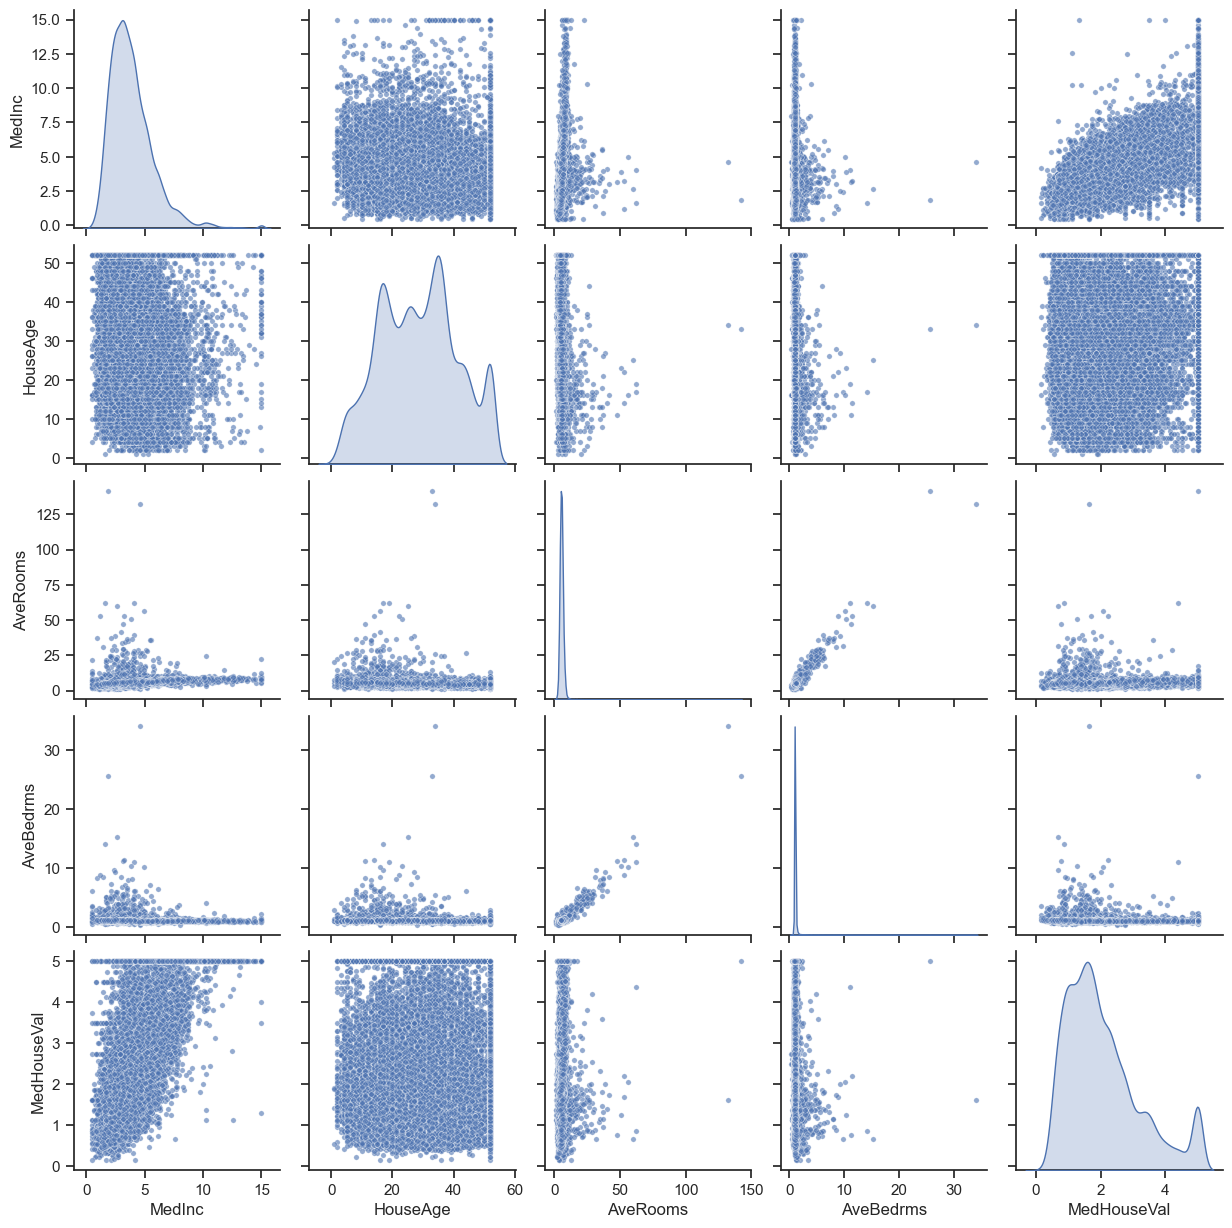

In [ ]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target
pair_grid = sns.pairplot(data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms','MedHouseVal']], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 15})
plt.show()

_________
Q3) Go to NOAA’s Climate at a Glance page and download the available time series data for the
average annual temperatures of New York City from 1895 to today (1895-2025). Implement simple
linear regression using average annual temperature data. Also, show how does the temperature trend
compare to the average January high temperatures?

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------


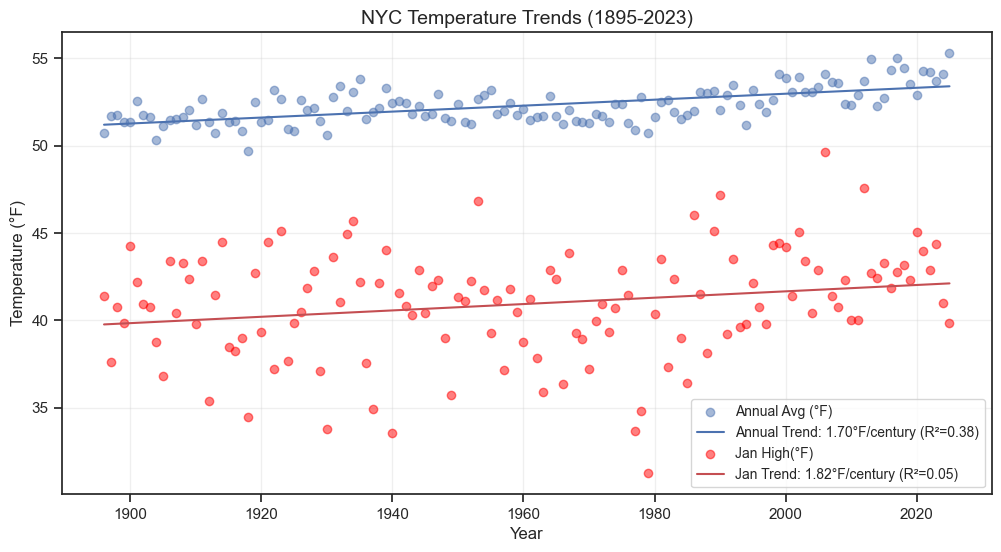

Temperature Trend Analysis Results:
Annual average warming rate: 1.70°F per century
January high warming rate: 1.82°F per century
Difference: 0.12°F/century (January warms␣faster)

Key Insights:
- January temperatures are warming faster than annual averages
- Urban heat island effect may amplify winter warming
- Recent years (2010+) show accelerated warming in both series


In [ ]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

def load_noaa_data(filename):
    df = pd.read_csv(filename, comment='#')
    df = df[df['Value'] != -99] # Remove missing values
    df['Year'] = df['Date'].astype(str).str[:4].astype(int)
    return df[['Year', 'Value']]

annual_df = load_noaa_data('AnnualAvg.csv').rename(columns={'Value':'Annual_Avg'})
jan_df = load_noaa_data('JanMax.csv').rename(columns={'Value': 'Jan_High'})
df = pd.merge(annual_df, jan_df, on='Year')

def calculate_trend(df, col_name):
    X = df[['Year']].values
    y = df[col_name].values
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)
    rate = model.coef_[0] * 100 # Change per century
    r2 = model.score(X, y)
    return trend, rate, r2

df['Annual_Trend'], annual_rate, annual_r2 = calculate_trend(df, 'Annual_Avg')
df['Jan_Trend'], jan_rate, jan_r2 = calculate_trend(df, 'Jan_High')
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Annual_Avg'], alpha=0.5, label='Annual Avg (°F)')
plt.plot(df['Year'], df['Annual_Trend'], 'b-',label=f'Annual Trend: {annual_rate:.2f}°F/century (R²={annual_r2:.2f})')
plt.scatter(df['Year'], df['Jan_High'], alpha=0.5, color='red', label='Jan High(°F)')
plt.plot(df['Year'], df['Jan_Trend'], 'r-',label=f'Jan Trend: {jan_rate:.2f}°F/century (R²={jan_r2:.2f})')
plt.title('NYC Temperature Trends (1895-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°F)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

print("Temperature Trend Analysis Results:")
print(f"Annual average warming rate: {annual_rate:.2f}°F per century")
print(f"January high warming rate: {jan_rate:.2f}°F per century")
print(f"Difference: {jan_rate - annual_rate:.2f}°F/century (January warms␣faster)")
print(f"\nKey Insights:")
print("- January temperatures are warming faster than annual averages")
print("- Urban heat island effect may amplify winter warming")
print("- Recent years (2010+) show accelerated warming in both series")


____________________
Q4) Load the Iris dataset from the scikit-learn library and perform classification on it with the k-nearest
neighbors algorithm. Use a KNeighborsClassifier with the default k value. What is the prediction
accuracy?

In [29]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------
Prediction accuracy: 1.00 (100.0%)


_____________
Q5) You are given a dataset of 2D points with their corresponding class labels. The dataset is as follows:
-    Point_ID x y Class
-    A 2.0 3.0 0
-    B 1.0 1.0 0
-    C 4.0 4.0 1
-    D 5.0 2.0 1

A new point P with coordinates (3.0, 3.0) needs to be classified using the KNN algorithm. Use the
Euclidean distance to calculate the distance between points.

In [31]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
X = np.array([
    [2.0, 3.0], # Point A
    [1.0, 1.0], # Point B
    [4.0, 4.0], # Point C
    [5.0, 2.0] # Point D
])
y = [0, 0, 1, 1]
new_point = np.array([[3.0, 3.0]])
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)
prediction = knn.predict(new_point)
print(f"The new point P is classified as class: {prediction[0]}")

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------
The new point P is classified as class: 1


_______________
Q6) A teacher wants to classify students as ”Pass” or ”Fail” based on their performance in three exams.
The dataset includes three features:
- Exam 1 Score Exam 2 Score Exam 3 Score Class (Pass/Fail)
- 85 90 88 Pass
- 70 75 80 Pass
- 60 65 70 Fail
- 50 55 58 Fail
- 95 92 96 Pass
- 45 50 48 Fail

A new student has the following scores:
- Exam 1 Score: 72
- Exam 2 Score: 78
- Exam 3 Score: 75

Classify this student using the K-Nearest Neighbors (KNN) algorithm with k = 3.

In [33]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
X = np.array([
    [85, 90, 88],
    [70, 75, 80],
    [60, 65, 70],
    [50, 55, 58],
    [95, 92, 96],
    [45, 50, 48]
])
y = ['Pass', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail']
new_student = np.array([[72, 78, 75]])
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
prediction = knn.predict(new_student)
print(f"The new student is classified as: {prediction[0]}")

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------
The new student is classified as: Pass


___________
Q7) Using scikit-learn’s KFold class and the cross val score function, determine the optimal value for k to classify the Iris dataset using a KNeighborsClassifier.

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------


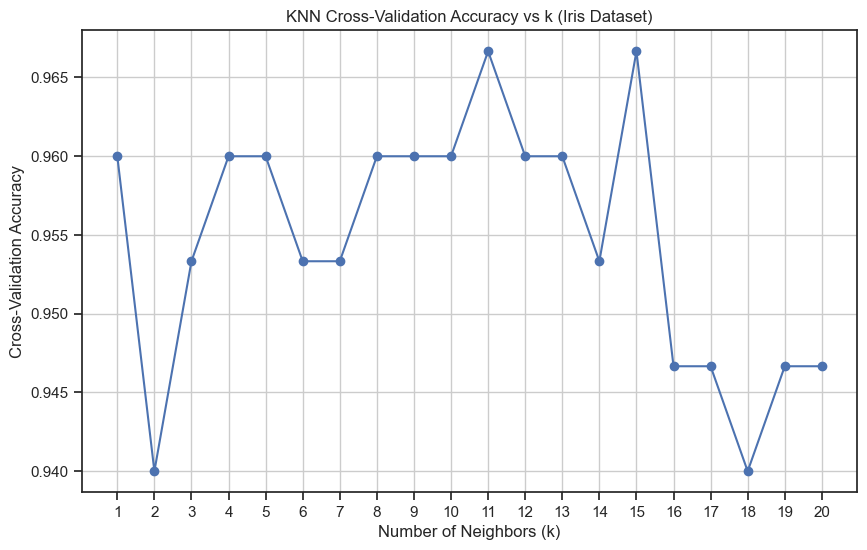

Optimal number of neighbors (k): 11


In [ ]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
kf = KFold(n_splits=5, shuffle=True, random_state=0)
k_values = range(1, 21)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kf)
    mean_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title("KNN Cross-Validation Accuracy vs k (Iris Dataset)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()

optimal_k = k_values[np.argmax(mean_scores)]
print(f"Optimal number of neighbors (k): {optimal_k}")

_____________________
Q8) Write a Python script to perform K-Means clustering on the following dataset:

    _Dataset: {(1, 1), (2, 2), (3, 3), (8, 8), (9, 9), (10, 10)}_. 

Use k=2 and visualize the clusters.

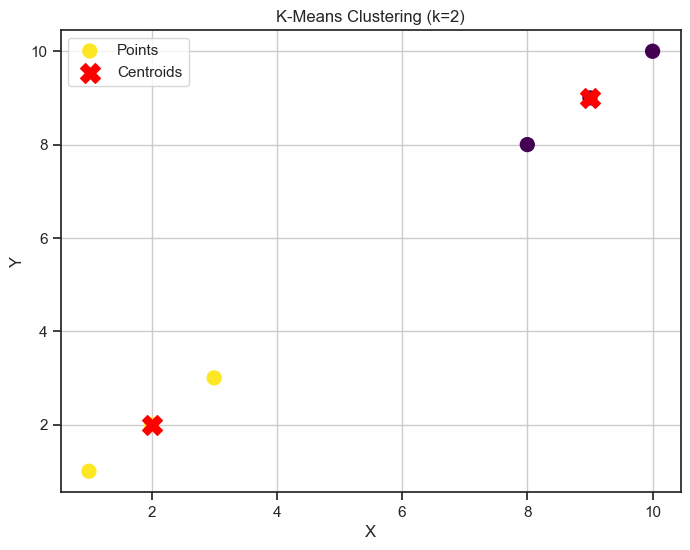

In [ ]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array([(1, 1), (2, 2), (3, 3), (8, 8), (9, 9), (10, 10)])
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=100,label='Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200,label='Centroids')
plt.title("K-Means Clustering (k=2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

___________
Q9) Write a Python script to perform K-Means clustering on the following dataset: Mall Customer Segmentation. Use k = 5 (also, determine optimal k via the Elbow Method) and visualize the clusters to identify customer segments.

Expected Output:
- Scatter plot showing clusters (e.g., “High Income-Low Spenders,” “Moderate Income-Moderate Spenders”).
- Insights for targeted marketing strategies.

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------


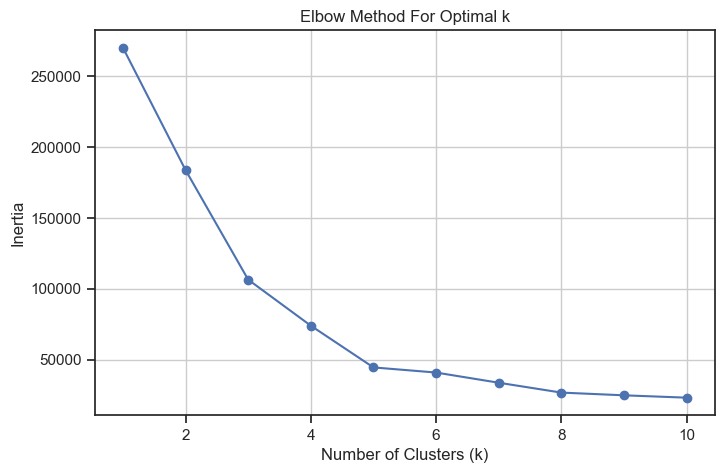

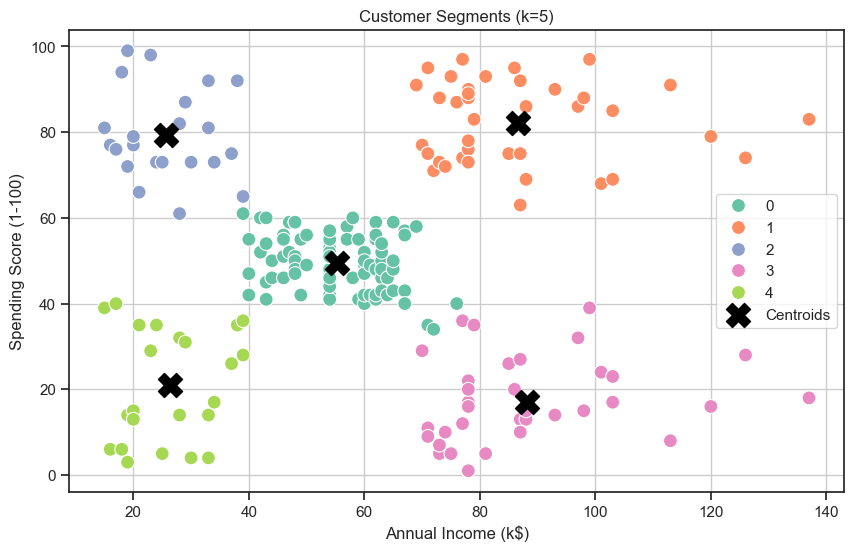

In [41]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segments (k=5)')
plt.legend()
plt.grid(True)
plt.show()

_____________
Q10) Perform the following tasks using the pandas Series object:

    (a) Create a Series from the list [7, 11, 13, 17].

    (b) Create a Series with five elements where each element is 100.0.

    (c) Create a Series with 20 elements that are all random numbers in the range 0 to 100. Use the describe method to produce the Series’ basic descriptive statistics.

    (d) Create a Series called temperatures with the following floating-point values: 98.6, 98.9, 100.2, and 97.9. Use the index keyword argument to specify the custom indices ’Julie’, ’Charlie’, ’Sam’, and ’Andrea’.

    (e) Form a dictionary from the names and values in Part (d), then use it to initialize a Series.

In [43]:
print('''Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------''')

import pandas as pd
import numpy as np

# (a) Create a Series from the list [7, 11, 13, 17]
series_a = pd.Series([7, 11, 13, 17])
print("(a) Series from list:\n", series_a, "\n")

# (b) Create a Series with five elements where each element is 100.0
series_b = pd.Series([100.0] * 5)
print("(b) Series of five 100.0s:\n", series_b, "\n")

# (c) Create a Series with 20 elements that are random numbers from 0 to 100
series_c = pd.Series(np.random.randint(0, 101, size=20))
print("(c) Series of 20 random numbers:\n", series_c, "\n")
print("Descriptive statistics:\n", series_c.describe(), "\n")

# (d) Create a Series called temperatures with custom indices
temperatures = pd.Series([98.6, 98.9, 100.2, 97.9], index=['Julie', 'Charlie', 'Sam', 'Andrea'])
print("(d) Temperatures Series with custom indices:\n", temperatures, "\n")

# (e) Form a dictionary from (d) and use it to initialize a Series
temp_dict = {'Julie': 98.6, 'Charlie': 98.9, 'Sam': 100.2, 'Andrea': 97.9}
series_e = pd.Series(temp_dict)
print("(e) Series from dictionary:\n", series_e)

print("Verification that (d) and (e) are equivalent:")
print("Are the two Series equal?", temperatures.equals(series_e))

Name: Sidhanta Barik, RegNo: 2241002049
----------------------------------------------------
(a) Series from list:
 0     7
1    11
2    13
3    17
dtype: int64 

(b) Series of five 100.0s:
 0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
dtype: float64 

(c) Series of 20 random numbers:
 0     34
1     29
2     42
3     10
4     87
5     94
6     92
7      6
8     15
9     64
10    37
11    90
12    22
13    63
14    44
15    90
16    81
17    44
18    93
19    95
dtype: int32 

Descriptive statistics:
 count    20.000000
mean     56.600000
std      31.743047
min       6.000000
25%      32.750000
50%      53.500000
75%      90.000000
max      95.000000
dtype: float64 

(d) Temperatures Series with custom indices:
 Julie       98.6
Charlie     98.9
Sam        100.2
Andrea      97.9
dtype: float64 

(e) Series from dictionary:
 Julie       98.6
Charlie     98.9
Sam        100.2
Andrea      97.9
dtype: float64
Verification that (d) and (e) are equivalent:
Are the two Series equal?